In [21]:
import math 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [30]:
# Assign spreadsheet filename to `file`
folder="C:/Users/SaiP/Downloads/Processing"
method="RL" # options are ILP2, Heu, RL
network="Nobel_EU" #Germany_17 #Nobel_EU #Sweden
fiber = "_2fibers" # Scenarios are _2fibers or _4fibers


file = folder+"/COST_"+method+fiber+".xlsx"
sheet=network+'_Upgrade_order'
# Load spreadsheet
df = pd.read_excel(file,  sheet_name=sheet)

#print(df)

nlinks= len(df.index)-1
nyears=10

links={}
order=np.zeros((nlinks,nyears))
fibers= np.zeros((nlinks,nyears))
bands= np.zeros((nlinks,nyears))

#Processing data
for i in range(nlinks):
    for j in range(nyears):
        if j==0:
            order[i,j]=1+df.iloc[i][str(j)+' C-L']+df.iloc[i][str(j)+' L-S']+df.iloc[i][str(j)+' S-C']
        else:
            order[i,j]=order[i,j-1]+df.iloc[i][str(j)+' C-L']+df.iloc[i][str(j)+' L-S']+df.iloc[i][str(j)+' S-C']
            
        fibers[i,j]=math.ceil(order[i,j]/3)
        bands[i,j]=order[i,j]%3 if order[i,j]%3!=0 else 3  

In [ ]:
# Drawing the activation table
df = pd.DataFrame(order, index=pd.Index(np.arange(0,nlinks)), columns=np.arange(1,nyears+1))    
vals = np.around(df.values,2)
if "4fibers" in fiber:
    norm=plt.Normalize(1,12)
    colours = plt.cm.viridis(norm(vals))

    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111, frameon=True, xticks=[], yticks=[])
else:
    norm=plt.Normalize(1,6)
    colours = plt.cm.viridis(norm(vals))

    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111, frameon=True, xticks=[], yticks=[])

ll=[]
for i in range(nlinks):
    l=[]
    for j in range(nyears):
        if bands[i,j]==1: 
            l.append(str(int(fibers[i,j]))+'C')
        elif bands[i,j]==2: 
            l.append(str(int(fibers[i,j]))+'L')
        elif bands[i,j]==3: 
            l.append(str(int(fibers[i,j]))+'S')       
    ll.append(l)     


plt.table(cellText=ll, rowLabels=df.index, colLabels=df.columns,colWidths = [0.03]*vals.shape[1], loc='center', cellColours=colours)
        

plt.show()

In [ ]:
if "4fibers" in fiber:
    sol=np.zeros((12,nyears))
    for y in range(nyears):
        for i in range(nlinks):
            if ll[i][y]=="1C": sol[0,y]+=1
            elif ll[i][y]=="1L": sol[1,y]+=1
            elif ll[i][y]=="1S": sol[2,y]+=1
            elif ll[i][y]=="2C": sol[3,y]+=1
            elif ll[i][y]=="2L": sol[4,y]+=1
            elif ll[i][y]=="2S": sol[5,y]+=1
            elif ll[i][y]=="3C": sol[6,y]+=1
            elif ll[i][y]=="3L": sol[7,y]+=1
            elif ll[i][y]=="3S": sol[8,y]+=1
            elif ll[i][y]=="4C": sol[9,y]+=1
            elif ll[i][y]=="4L": sol[10,y]+=1
            elif ll[i][y]=="4S": sol[11,y]+=1

    sol2=np.zeros((12,nyears))
    sol2=sol/nlinks*100
else:
    sol=np.zeros((6,nyears))
    for y in range(nyears):
        for i in range(nlinks):
            
            if ll[i][y]=="1C": sol[0,y]+=1
            elif ll[i][y]=="1L": sol[1,y]+=1
            elif ll[i][y]=="1S": sol[2,y]+=1
            elif ll[i][y]=="2C": sol[3,y]+=1
            elif ll[i][y]=="2L": sol[4,y]+=1
            elif ll[i][y]=="2S": sol[5,y]+=1

    sol2=np.zeros((6,nyears))
    sol2=sol/nlinks*100
print(sol)
print(sol2)


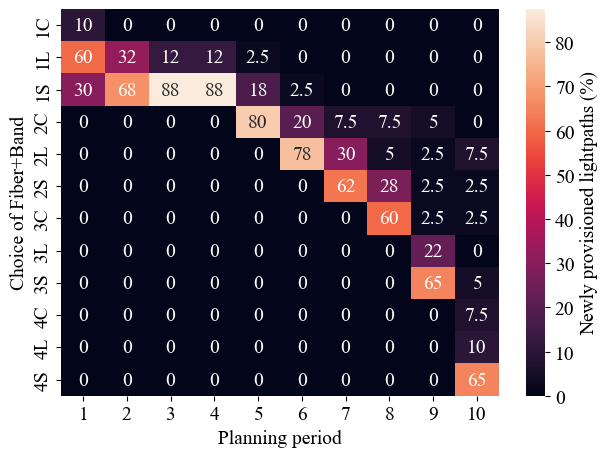

In [29]:
import seaborn as sns
if "4fibers" in fiber:
    df = pd.DataFrame(sol2, index=["1C","1L","1S","2C","2L","2S","3C","3L","3S","4C","4L","4S"], columns=np.arange(1,nyears+1))
else:    
    df = pd.DataFrame(sol2, index=["1C","1L","1S","2C","2L","2S"], columns=np.arange(1,nyears+1))    
vals = np.around(df.values,2)
norm=plt.Normalize(1,50)
colours = plt.cm.plasma(norm(vals))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 14
fig = plt.figure()
ax = fig.add_subplot(111, frameon=True, xticks=[], yticks=[])

#ax.table(cellText=sol2.astype(int), rowLabels=["1C","1L","1S","2C","2L","2S","3C","3L","3S","4C","4L","4S"], colLabels=df.columns, 
#                            colWidths = [0.03]*vals.shape[1], loc='center', 
#                            cellColours=colours)
sns.heatmap(df, annot=True,cbar_kws={'label': 'Newly provisioned lightpaths (%)'})
for t in ax.texts: t.set_text(t.get_text())
ax.set_xlabel("Planning period")
ax.set_ylabel("Choice of Fiber+Band")
plt.tight_layout()
plt.savefig("links-vs-bands-"+method+"-"+network+fiber+".pdf", bbox_inches="tight", format="pdf", transparent=True)
plt.show()

In [11]:
np.format_float_positional(56294995342131.39, precision=1)

'56294995342131.4'